In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import pandas as pd
import numpy as np
import glob
import os

sns.set_theme(context='paper', style='whitegrid', font_scale=1)

In [9]:
def load_data(config, experiment, metric):
    g = f"result/{experiment}/*-{config}-{metric}.csv"

    # Create an empty list to store individual dataframes
    dataframes = []

    # Iterate over each CSV file using glob
    for file in glob.glob(g):
        # Read the CSV file into a dataframe
        df = pd.read_csv(file)
        # Add a new column with the filename
        df['filename'] = file
        df = df.iloc[-2:-1]

        # Append the dataframe to the list
        dataframes.append(df)

    # Concatenate all dataframes into a single dataframe
    df = pd.concat(dataframes, ignore_index=True)
    # df = df.drop("filename", axis=1)
    # df = df.groupby(["experiment", "task", "config", "timestamp"]).mean()
    # df = df.reset_index()
    df = df.drop(columns=["filename"])
    df = df.groupby(["experiment", "task", "config", "timestamp"]).mean().reset_index()
    df = df.sort_values(["experiment", "task"])
    return df

In [10]:
def plot_experiment_sns(config, experiment, metric, statistic):
    df = load_data(config, experiment, metric)
    g = sns.catplot(data=df, x="task", y=statistic, hue="experiment", kind="bar", aspect=2)
    g.set_titles(template="")
    g.set_xticklabels(rotation=30)

    # for i, row in df.iterrows():
    #     x_pos = g.ax.get_xticks()[i]  # Get the categorical x-axis position
    #     plt.errorbar(x_pos, row['p50'], yerr=[[row['p50'] - row['p10']], [row['p90'] - row['p50']]], color='k')

    # plt.tight_layout()
    try:
        os.mkdir("plot")
    except:
        pass
    plt.savefig(f"plot/{experiment}-{config}-{metric}.pdf".replace("*", "all"), bbox_inches="tight")

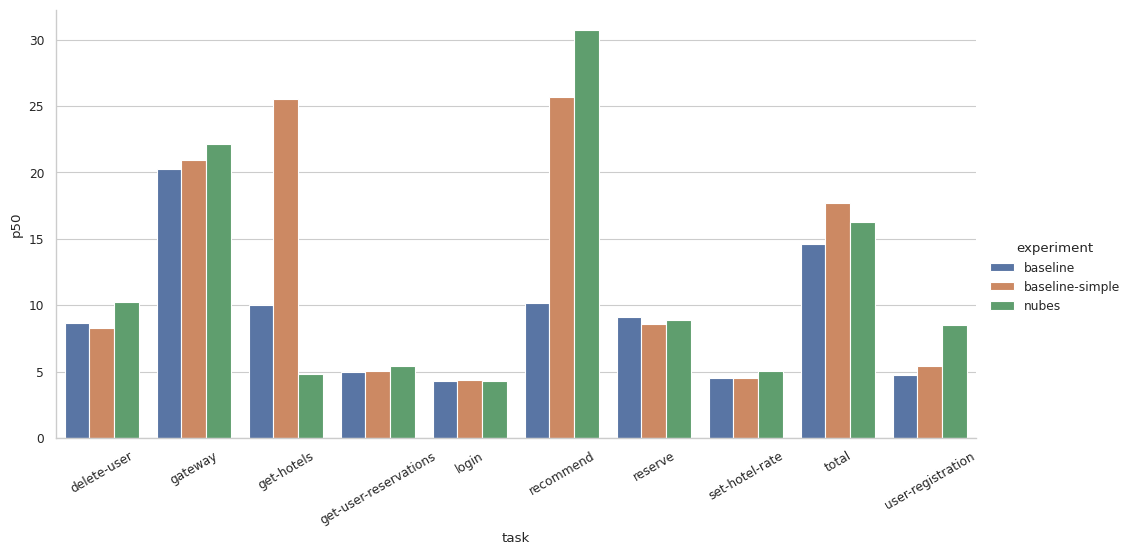

In [11]:
plot_experiment_sns(
    config="small-r1000-120s",
    experiment="*",
    metric="duration",
    statistic="p50",
)

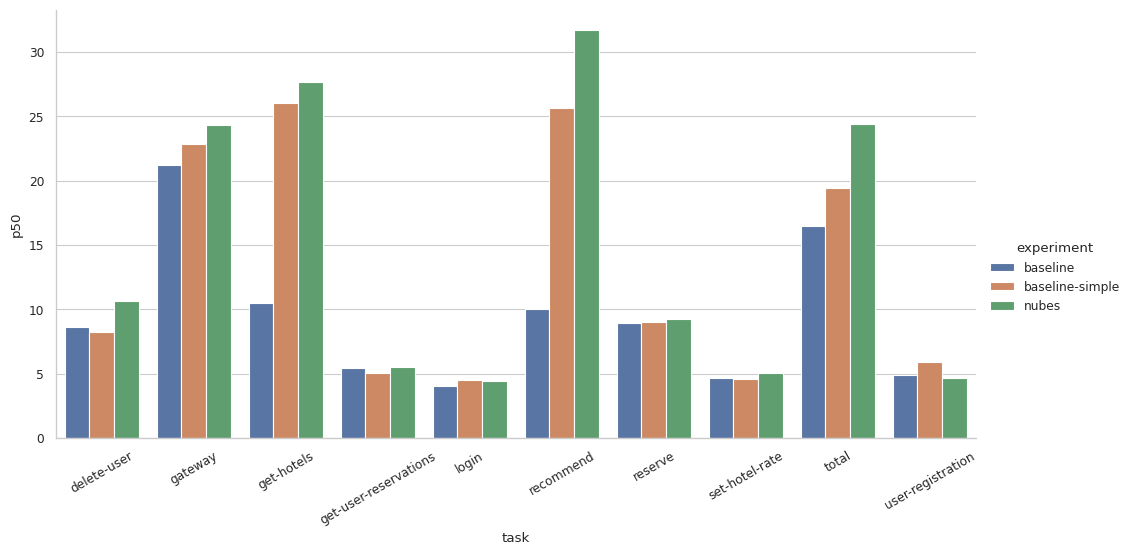

In [12]:
plot_experiment_sns(
    config="small-r100-120s",
    experiment="*",
    metric="duration",
    statistic="p50",
)

In [13]:
def plot_experiment(config, experiment, metric):
    df = load_data(config, experiment, metric)

    df = df[~df["task"].isin(["total"])]
    # Get unique tasks and experiments
    tasks = df['task'].unique()
    experiments = df['experiment'].unique()

    # Set up the figure and axis
    fig, ax = plt.subplots()

    # Set the width of each bar
    bar_width = 0.275

    # Calculate the x-coordinate for each group of bars
    x = np.arange(len(tasks))

    # Iterate over the experiments
    for i, experiment in enumerate(experiments):
        # Get the subset of df for the current experiment
        subset = df[df['experiment'] == experiment]
        # Calculate the x-coordinate for the bars within each group
        x_bars = x + i * bar_width

        # Plot the median values
        ax.bar(x_bars, subset['p50'], width=bar_width, label=experiment)

        # Plot the p10 and p90 percentiles as error bars
        ax.errorbar(x_bars, subset['p50'], yerr=[subset['p10'], subset['p90']],
                    fmt='none', color='black', alpha=0.4, capsize=2)

    # Set the x-axis ticks and labels
    ax.set_xticks(x + (len(experiments) * bar_width) / 2)
    ax.set_xticklabels(tasks)

    # Set the y-axis label
    ax.set_ylabel('Values')
    ax.set_xticklabels(tasks, rotation=90)


    # Add a legend
    ax.legend()

    # Show the plot
    try:
        os.mkdir("plot")
    except:
        pass
    plt.savefig(f"plot/{experiment}-{config}-{metric}-p.pdf".replace("*", "all"), bbox_inches="tight")
    plt.show()

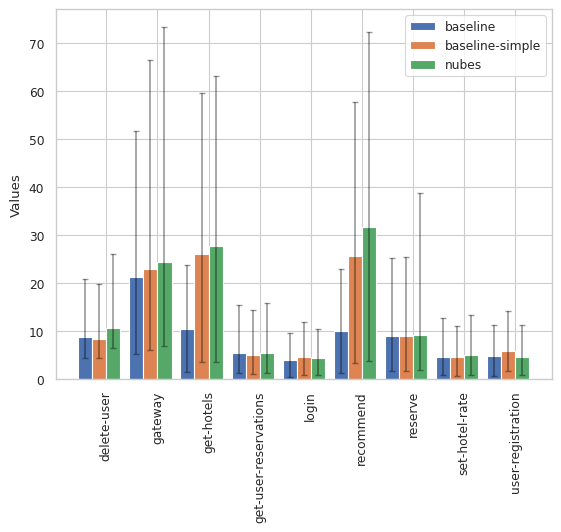

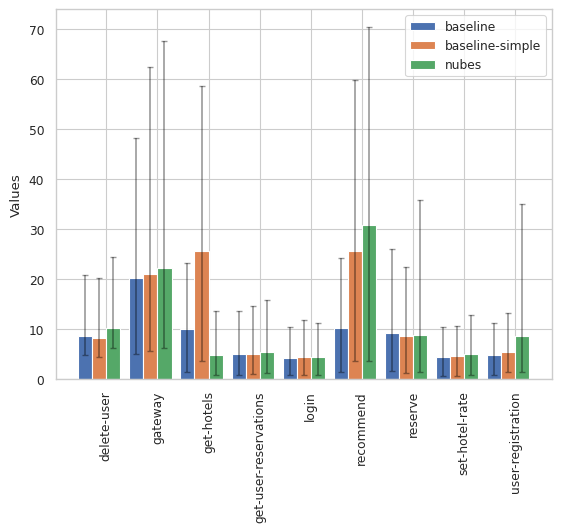

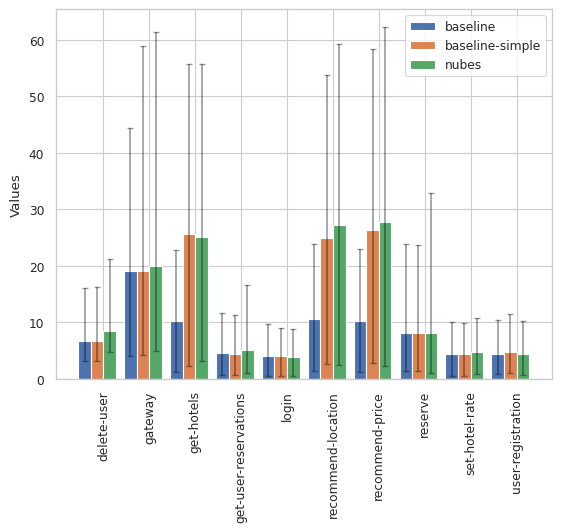

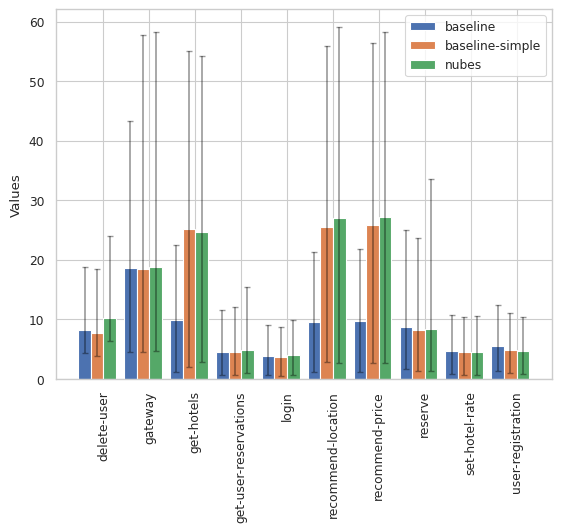

In [17]:
plot_experiment(
    config="small-r100-120s",
    experiment="*",
    metric="duration"
)

plot_experiment(
    config="small-r1000-120s",
    experiment="*",
    metric="duration"
)

plot_experiment(
    config="large-r100-120s",
    experiment="*",
    metric="duration"
)

plot_experiment(
    config="large-r1000-120s",
    experiment="*",
    metric="duration"
)